Generates 10 random 3D coordinates, rotate and translate them, and show how
the displacement can be fitted and predicted with `ModelDisplacement`.

In [1]:
%matplotlib notebook

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from ecoggui import ModelDisplacement

<IPython.core.display.Javascript object>


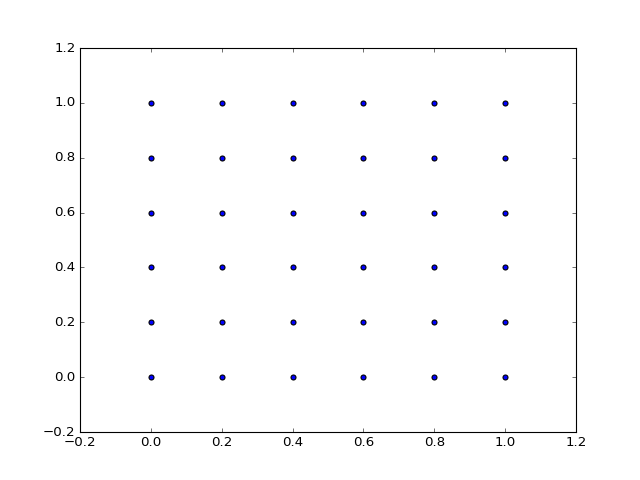

In [2]:
# Make a random flat grid. Note that it works for any solid objects.
n_samples = 6 ** 2
X = np.meshgrid(np.linspace(0, 1., np.sqrt(n_samples)),  # x axis
                np.linspace(0, 1., np.sqrt(n_samples)))  # y axis
X = np.mat(np.transpose([ii.ravel() for ii in X]))
X = np.hstack((X, np.zeros((len(X), 1))))  # add z axis

plt.scatter(X[:, 0], X[:, 1])
plt.show()

<IPython.core.display.Javascript object>


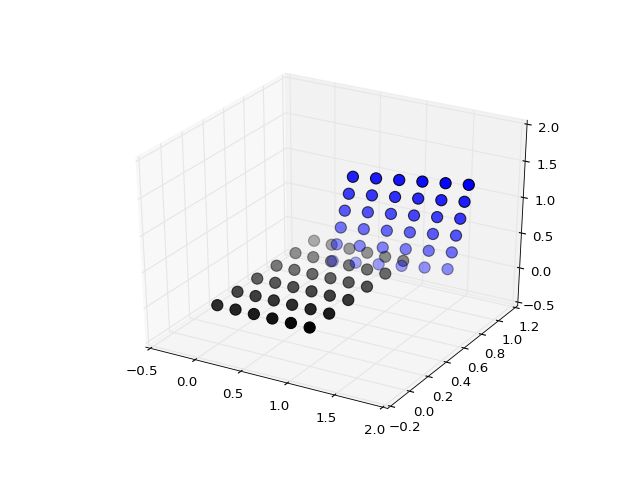

In [3]:
# Random rotation and translation
R = np.mat(np.random.rand(3, 3))
t = np.mat(np.random.rand(3, 1))

# make R a proper rotation matrix, force orthonormal
U, S, Vt = np.linalg.svd(R)
R = U * Vt

# remove reflection
if np.linalg.det(R) < 0:
    Vt[2, :] *= -1
    R = U * Vt

# Displace X points
Y = R * X.T + np.tile(t, (1, n_samples))
Y = Y.T

# To avoid confusion, we'll now treat these matrices as array:
X, Y = np.array(X), np.array(Y)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=100, c='k')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], s=100, c='b')
plt.show()

2.30755522366e-15


<IPython.core.display.Javascript object>


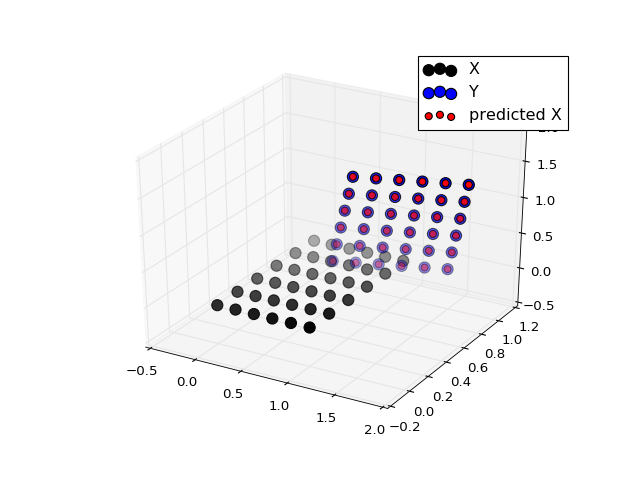

In [4]:
# recover the transformation
displacer = ModelDisplacement()
displacer.fit(X, Y)
Xt = displacer.transform(X)

# Compute the error between the true Y position and the predicted X position
# from the rotation + translation fit
err = np.sqrt(np.sum((Xt - Y) ** 2))
print(err)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=100, c='k')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], s=100, c='b')
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], s=40, c='r')
ax.legend(['X', 'Y', 'predicted X'])
plt.show()